<a href="https://colab.research.google.com/github/MGhassen30798/Insight/blob/Prediction-from-retina-pic-server/Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload data from kaggle


In [ ]:
# from google.colab import files
# files.upload()  #this will prompt you to upload the kaggle.json

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission

# Download required dataset / competition files to a folder of your choice
# !kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k -p /content/drive/My\ Drive/Ocular\ Disease\ Recognition

# import os
# !unzip -q /content/drive/My\ Drive/Ocular\ Disease\ Recognition/ocular-disease-recognition-odir5k.zip -d /content/drive/My\ Drive/Ocular\ Disease\

# Importation 

### ***Python module and package***

---


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
from matplotlib import pyplot as plt

from datetime import datetime
import re
import sklearn
from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)




from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix,classification_report

from tqdm import tqdm
import os
import cv2
import random
from google.colab.patches import cv2_imshow
from skimage.feature import canny
from skimage import filters
from skimage import data
from skimage import color 
from skimage import exposure

from sklearn.metrics import classification_report
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import time
import math
import random



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Open Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/Ocular Disease'

# READING CSV FILE

open csv **file**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ocular Disease/full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

# Display information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [ ]:
df[df == 1].sum(axis=0)

ID                              2.0
Patient Age                    28.0
Patient Sex                       0
Left-Fundus                       0
Right-Fundus                      0
Left-Diagnostic Keywords          0
Right-Diagnostic Keywords         0
N                            2101.0
D                            2123.0
G                             397.0
C                             402.0
A                             319.0
H                             203.0
M                             306.0
O                            1588.0
filepath                          0
labels                            0
target                            0
filename                          0
dtype: object


We found that counting on the encoded diagnosis categories "N D G C A H M O" might be problematic within the sense that a number of the values were positive for both normal and disease eyes, but didn't specify which eye. the matter with this is often that the files and diagnosis are orientation specific and therefore the row of knowledge contains both eyes information. If we use the categories exclusively, we run into the matter afterward where pulling specific eye orientation data is impossible because it is lost within the encoded categories.

Therefore we'll exclude those categories for this notebook although they might certainly be used for other investigations.

In [ ]:
df_data = df.iloc[:, 1:7]
df_data.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


# Data visualization 


**All data visualization : ** 

---

https://colab.research.google.com/drive/1uVVmUqTwXPakt3p30Jh9bTyLVUybpDhD#scrollTo=49f4e1cf-2f3d-4d92-a902-4ec1d63164c6

In [ ]:
def plot_count(feature, title, df, size=1, show_all=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if show_all:
        g = sns.countplot(df[feature], palette='Set3')
        g.set_title("{} distribution".format(title))
    else:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set2')
        if(size > 2):
            plt.xticks(rotation=90, size=8)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 0.2,
                        '{:1.2f}%'.format(100*height/total),
                        ha="center") 
        g.set_title("Number and percentage of {}".format(title))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


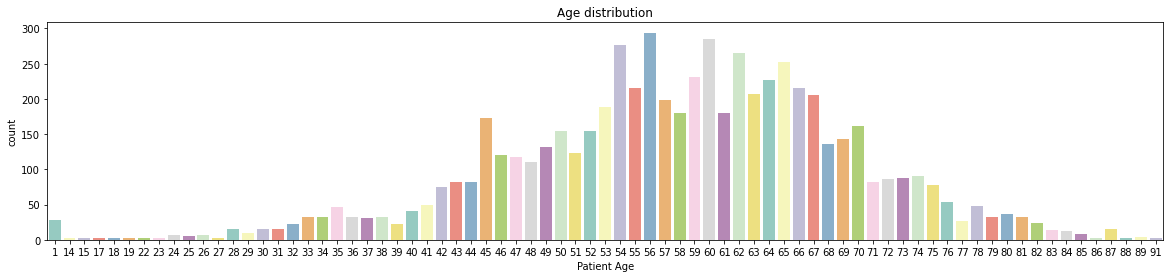

In [ ]:
plot_count("Patient Age", "Age", df_data, size=5, show_all=True)

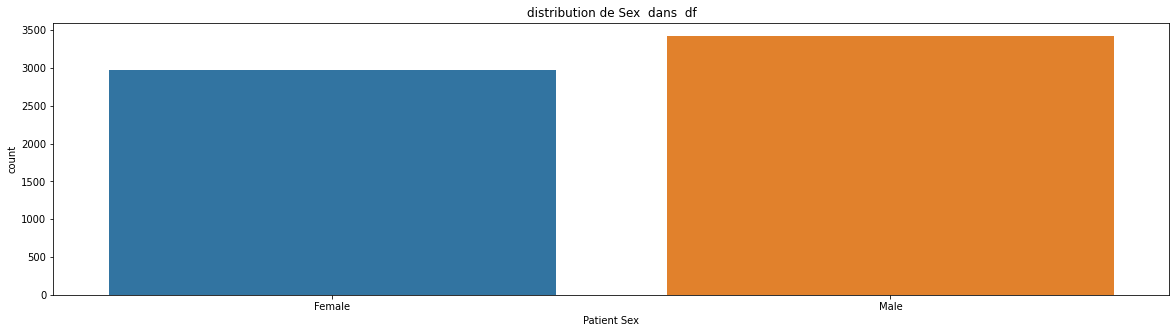

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20,5))
sns.countplot(ax=ax1, x="Patient Sex", data=df)
ax1.set_title("distribution de Sex  dans  df")
plt.show()

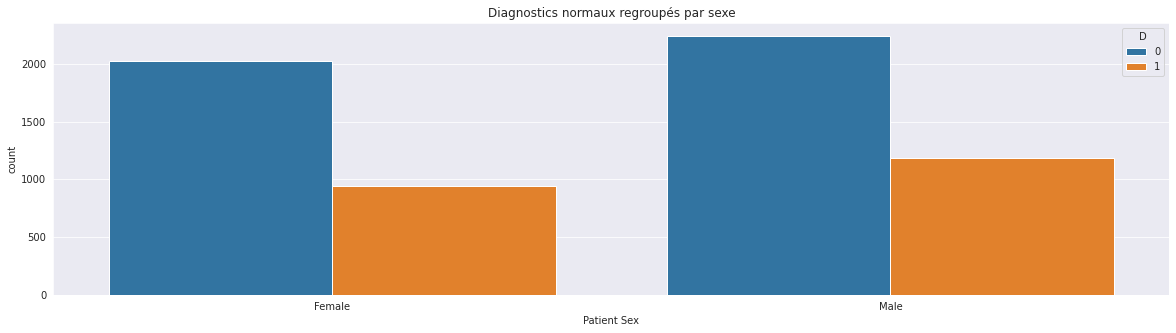

In [ ]:
sns.set_style("darkgrid")
fig= plt.subplots(figsize=(20,5))
sns.countplot(x='Patient Sex', hue="D", data=df)
plt.title("Diagnostics normaux regroupés par sexe")
plt.show()

In [ ]:
list_names =['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
maladies = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Age related Macular Degeneration', 'Hypertension', 'Pathological Myopia', 'Other']

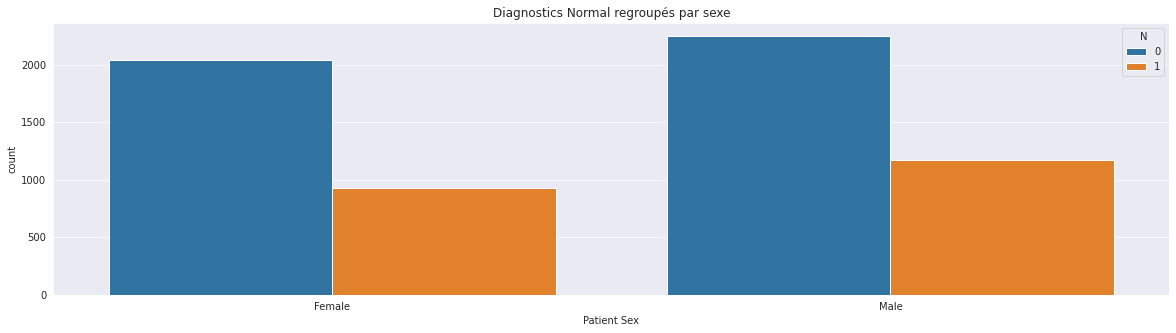

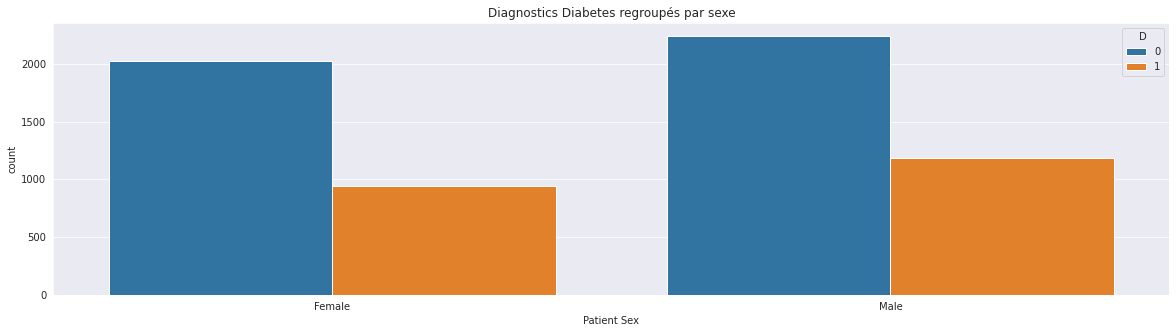

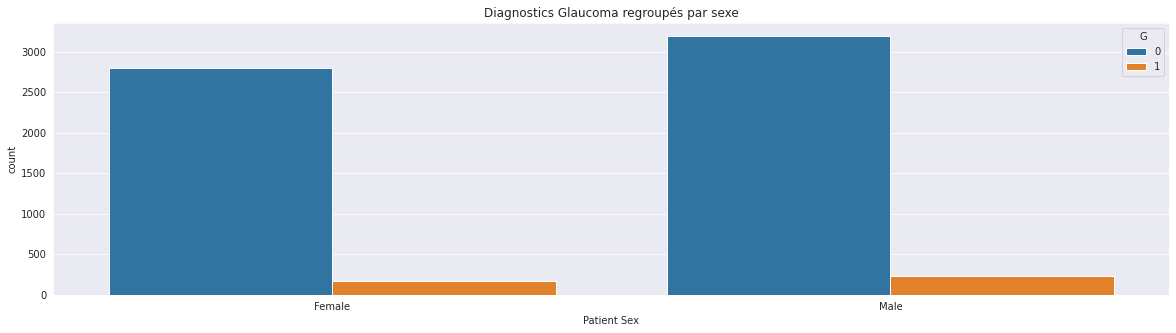

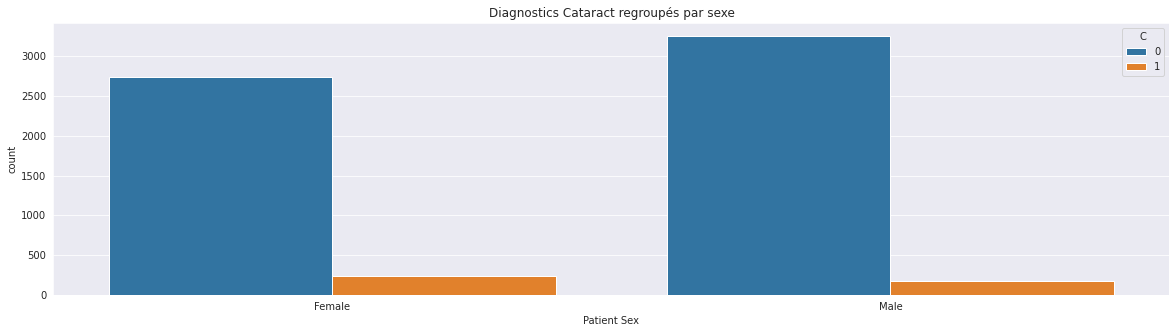

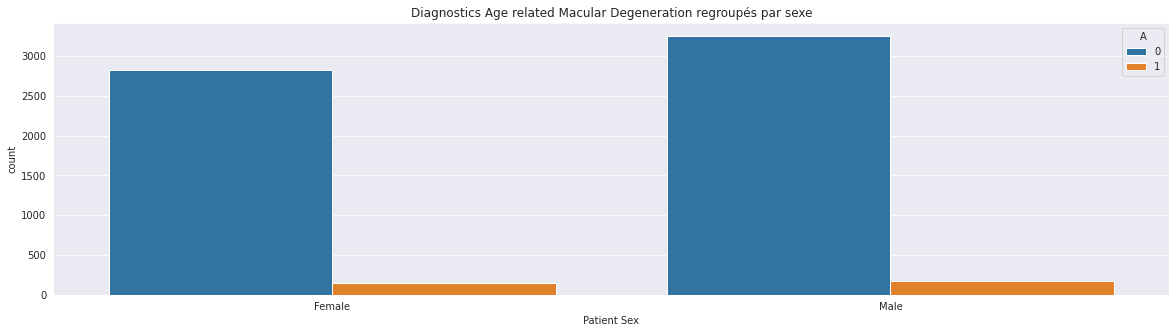

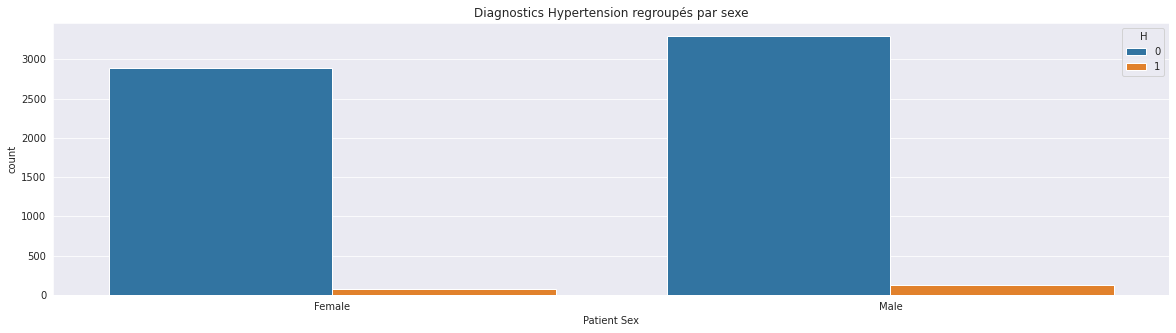

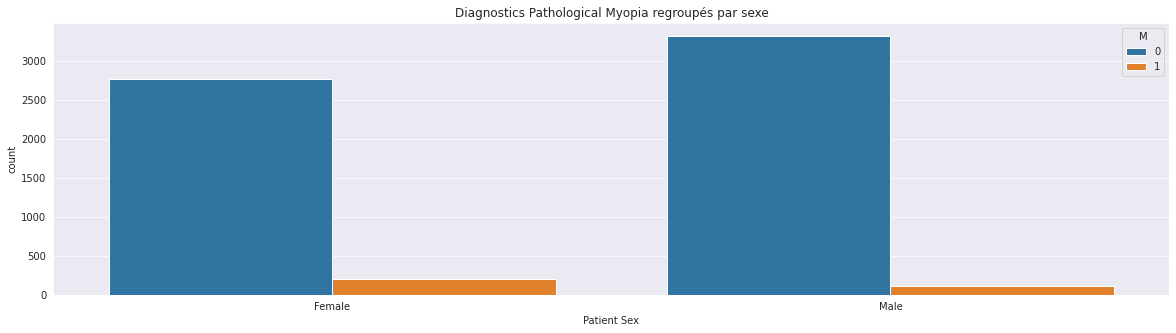

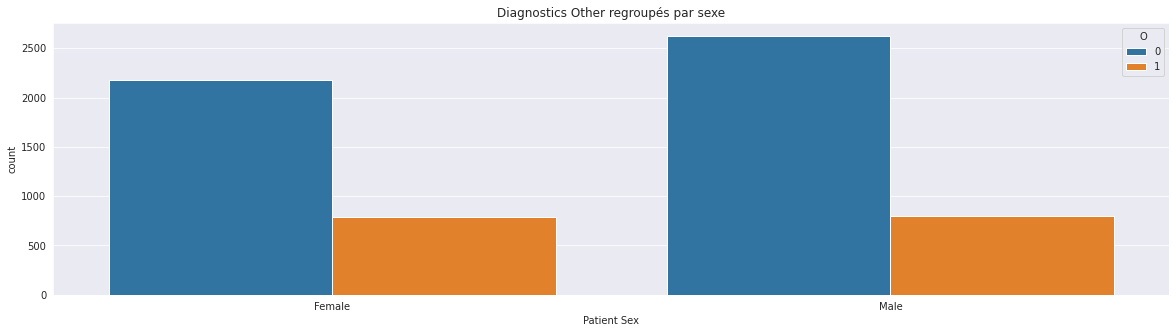

In [ ]:
for i in range(len(list_names)):
    sns.set_style("darkgrid")
    fig= plt.subplots(figsize=(20,5))
    sns.countplot(x='Patient Sex', hue=list_names[i], data=df)
    plt.title(f"Diagnostics {maladies[i]} regroupés par sexe")
    plt.show()

In [ ]:
from tqdm import tqdm
import os
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from skimage import exposure

In [ ]:
folder_dr = "/content/drive/MyDrive/Ocular Disease/preprocessed_images"


In [ ]:
def load_images_from_folder(folder , files_names):
    images = []
    for filename in files_names:
        img = plt.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
normals   = df[df['N'] == 1]
cataracts = df[df['C'] == 1]
diabetes  = df[df['D'] == 1]
glaucoma  = df[df['G'] == 1] 
age_related_macular_degeneration = df[df['A'] == 1] 
hypertension = df[df['H'] == 1] 
pathological_myopia = df[df['M'] == 1] 
other_diseases = df[df['O'] == 1]

In [ ]:
only_normals = df.loc[(df['N'] == 1 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]

only_cataracts = df.loc[(df['N'] == 0 ) & (df['C'] == 1) & (df['D'] == 0) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]

only_diabetes = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 1) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]
                     
only_glaucoma = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 1)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]
                     
only_age_related_macular_degeneration = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                                               & (df['A'] == 1) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]
                     
only_hypertension = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 1)  & (df['M'] == 0)  & (df['O'] == 0)]
                     
only_pathological_myopia = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 1)  & (df['O'] == 0)]
                     
only_other_diseases = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                       & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 1)]

In [ ]:
diseases_dect_lengthes = { #"normals" : len(normals),
                          "cataracts" : len(cataracts),
                          "diabetes" : len(diabetes),
                          "glaucoma" : len(glaucoma),
                          "age_related_macular_degeneration" : len(age_related_macular_degeneration),
                          "hypertension" : len(hypertension),
                          "pathological_myopia" : len(pathological_myopia),
                          "other_diseases" : len(other_diseases)
}

individual_diseases_dect_lengthes = {   #"normals" : len(only_normals),
                                        "cataracts" : len(only_cataracts),
                                        "diabetes" : len(only_diabetes),
                                        "glaucoma" : len(only_glaucoma),
                                        "age_related_macular_degeneration" : len(only_age_related_macular_degeneration),
                                        "hypertension" : len(only_hypertension),
                                        "pathological_myopia" : len(only_pathological_myopia),
                                        "other_diseases" : len(only_other_diseases)
}

In [ ]:
only_cataracts_left = only_cataracts.drop(only_cataracts[only_cataracts['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_cataracts_right = only_cataracts.drop(only_cataracts[only_cataracts['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_diabetes_left = only_diabetes.drop(only_diabetes[only_diabetes['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_diabetes_right = only_diabetes.drop(only_diabetes[only_diabetes['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_glaucoma_left = only_glaucoma.drop(only_glaucoma[only_glaucoma['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_glaucoma_right = only_glaucoma.drop(only_glaucoma[only_glaucoma['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_pathological_myopia_left = only_pathological_myopia.drop(only_pathological_myopia[only_pathological_myopia['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_pathological_myopia_right = only_pathological_myopia.drop(only_pathological_myopia[only_pathological_myopia['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_hypertension_left = only_hypertension.drop(only_hypertension[only_hypertension['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_hypertension_right = only_hypertension.drop(only_hypertension[only_hypertension['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_age_related_macular_degeneration_left = only_age_related_macular_degeneration.drop(only_age_related_macular_degeneration[only_age_related_macular_degeneration['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_age_related_macular_degeneration_right = only_age_related_macular_degeneration.drop(only_age_related_macular_degeneration[only_age_related_macular_degeneration['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)



In [ ]:
only_lefts_dict = {
                    "normal"    : only_normals,
                    "catarcts"  : only_cataracts_left ,
                    "diabetes"  : only_diabetes_left ,
                    "glaucomas" : only_glaucoma_left ,
                    "Age related Macular Degeneration" : only_age_related_macular_degeneration_left,
                    "pathological_myopias" : only_pathological_myopia_left ,
                    "hypertensions" : only_hypertension_left ,

}

only_rights_dict = {
                    "normal" : only_normals,
                    "catarcts" : only_cataracts_right ,
                    "diabetes" : only_diabetes_right ,
                    "glaucomas" : only_glaucoma_right ,
                    "pathological_myopias" : only_pathological_myopia_right ,
                    "Age related Macular Degeneration" : only_age_related_macular_degeneration_right,
                    "hypertensions" : only_hypertension_right ,

}

In [ ]:
#images_dict = {}
#for key, List in zip(only_lefts_dict.keys() , only_lefts_dict.values() ):
#  images_dict[key] = load_images_from_folder(folder_dr , List['Left-Fundus'])

In [ ]:
def plot_fundus(images_dict , keys=[] , image_effects_dict={}, randoms_seed =0 , num_of_columns = 5  ):
  #default case
  if len(keys) == 0:
    keys = images_dict.keys()
  
  plt.figure(figsize=(20*int(num_of_columns/5),20*len(keys)))# width , height

  for effect in image_effects_dict.keys():
    print(effect + '→' , end="")


  for j,key in  zip(range(len(images_dict)) ,keys) :
    for i in range(num_of_columns):
      image = images_dict[key][i+random_seed1*j]
      
      plt.subplot(2*len(keys) +2,num_of_columns,i+1+(num_of_columns*j))

      for effect in image_effects_dict.keys() :
        if effect == 'gamma' :
          image = exposure.adjust_gamma(image , gamma= image_effects_dict['gamma'])
        elif effect =='crop' :
          startX = image_effects_dict['crop'][0]
          startY = image_effects_dict['crop'][1]
          endX   = image_effects_dict['crop'][2]
          endY   = image_effects_dict['crop'][3]

          image = image[startY : endY , startX : endX]
        elif effect == 'resize' :
          image = cv2.resize(image , (image_effects_dict['resize'] , image_effects_dict['resize']))
        elif effect == 'threshold' :
          start = image_effects_dict['threshold'][0]
          end   = image_effects_dict['threshold'][1]
          ret , thresh = cv2.threshold(image , start, end, cv2.THRESH_TOZERO  )
          image = thresh
        elif effect == 'gray' or effect =='grey' :
          image = color.rgb2gray(image)
        elif effect == 'channel' :
          image = image[: , : , image_effects_dict['channel']]
        elif effect == 'mark_brightest' :
          # plt.imshow(image)
          v1 , v2, minLoc , maxLoc = cv2.minMaxLoc(image)
          plt.plot(maxLoc[0] ,maxLoc[1], "xr", markersize=25)
        elif effect == 'gaussian' :
          radius = image_effects_dict['gaussian']
          # image = color.rgb2gray(image)
          image = skimage.filters.gaussian(image ,sigma= (radius , radius))
          
        elif effect == 'canny' :
          if(image.shape[2] == 3) :#if RGB turn into gray
            image = color.rgb2grey(image)
          image = canny(image)
      
          
       
      plt.imshow(image)
      plt.xlabel(only_lefts_dict[key]['Left-Diagnostic Keywords'].values[i] + '\n(' +key+')' + f"\ngamma = {image_effects_dict['gamma']}"   , fontsize=16)

  plt.tight_layout()

In [ ]:
#import skimage
#images_dict = {}
#random_seed1 = 3
#keys = images_dict.keys() 
#image_effects_dict = {
#                        'threshold' : [50 , 255],
#                        'gamma'     : 2 , 
#                        'resize'    : 16 ,
#                        'channel'   : 0,
#                        'mark_brightest' : '',
#                        #'gaussian'  : 50
#}
#plot_fundus(images_dict , ['normal' , 'glaucomas' , 'catarcts' , 'diabetes' , 'pathological_myopias' , 'Age related Macular Degeneration' , 'hypertensions' ] , image_effects_dict=image_effects_dict , randoms_seed=random_seed1 )

# Preprocessing The Data




```
# This is formatted as code
```

Removing the noisy Data
---



In [ ]:
noisy_keyword= ['low image quality' , 'laser spot' , 'lens dust' , 'no fundus image'  , 'optic disk photographically invisible']

In [ ]:
for key in noisy_keyword:
  df.drop(df[ (df['Right-Diagnostic Keywords'].str.contains(key) ) | ( df['Left-Diagnostic Keywords'].str.contains(key) ) ].index , inplace = True )

Encapsulating diseases in dictionaries
---



Finding each disease separately

In [ ]:
normals   = df[df['N'] == 1]
cataracts = df[df['C'] == 1]
diabetes  = df[df['D'] == 1]
glaucoma  = df[df['G'] == 1] 
age_related_macular_degeneration = df[df['A'] == 1] 
hypertension = df[df['H'] == 1] 
pathological_myopia = df[df['M'] == 1] 
other_diseases = df[df['O'] == 1]

Finding those who has only one disease (to make differentiation betweeen diseases in visualization mor easier)

In [ ]:
only_normals = df.loc[(df['N'] == 1 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]

only_cataracts = df.loc[(df['N'] == 0 ) & (df['C'] == 1) & (df['D'] == 0) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]

only_diabetes = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 1) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]
                     
only_glaucoma = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 1)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]
                     
only_age_related_macular_degeneration = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                                               & (df['A'] == 1) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 0)]
                     
only_hypertension = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 1)  & (df['M'] == 0)  & (df['O'] == 0)]
                     
only_pathological_myopia = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                     & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 1)  & (df['O'] == 0)]
                     
only_other_diseases = df.loc[(df['N'] == 0 ) & (df['C'] == 0) & (df['D'] == 0) & (df['G'] == 0)
                       & (df['A'] == 0) & (df['H'] == 0)  & (df['M'] == 0)  & (df['O'] == 1)]

Encapsulating them in dectionaries

In [ ]:
diseases_dect_lengthes = { #"normals" : len(normals),
                          "cataracts" : len(cataracts),
                          "diabetes" : len(diabetes),
                          "glaucoma" : len(glaucoma),
                          "age_related_macular_degeneration" : len(age_related_macular_degeneration),
                          "hypertension" : len(hypertension),
                          "pathological_myopia" : len(pathological_myopia),
                          "other_diseases" : len(other_diseases)
}

individual_diseases_dect_lengthes = {   #"normals" : len(only_normals),
                                        "cataracts" : len(only_cataracts),
                                        "diabetes" : len(only_diabetes),
                                        "glaucoma" : len(only_glaucoma),
                                        "age_related_macular_degeneration" : len(only_age_related_macular_degeneration),
                                        "hypertension" : len(only_hypertension),
                                        "pathological_myopia" : len(only_pathological_myopia),
                                        "other_diseases" : len(only_other_diseases)
}

separating diseased left eyes from right ones (for visualization)


In [ ]:
only_cataracts_left = only_cataracts.drop(only_cataracts[only_cataracts['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_cataracts_right = only_cataracts.drop(only_cataracts[only_cataracts['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_diabetes_left = only_diabetes.drop(only_diabetes[only_diabetes['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_diabetes_right = only_diabetes.drop(only_diabetes[only_diabetes['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_glaucoma_left = only_glaucoma.drop(only_glaucoma[only_glaucoma['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_glaucoma_right = only_glaucoma.drop(only_glaucoma[only_glaucoma['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_pathological_myopia_left = only_pathological_myopia.drop(only_pathological_myopia[only_pathological_myopia['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_pathological_myopia_right = only_pathological_myopia.drop(only_pathological_myopia[only_pathological_myopia['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_hypertension_left = only_hypertension.drop(only_hypertension[only_hypertension['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_hypertension_right = only_hypertension.drop(only_hypertension[only_hypertension['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)

only_age_related_macular_degeneration_left = only_age_related_macular_degeneration.drop(only_age_related_macular_degeneration[only_age_related_macular_degeneration['Left-Diagnostic Keywords'].str.contains("normal fundus")].index)
only_age_related_macular_degeneration_right = only_age_related_macular_degeneration.drop(only_age_related_macular_degeneration[only_age_related_macular_degeneration['Right-Diagnostic Keywords'].str.contains("normal fundus")].index)



Getting each diagnostic keywords for each disease
---



In [ ]:
def get_unique_diagnoses(df):
  result = []
  for x in df['Left-Diagnostic Keywords'] +'，' + df['Right-Diagnostic Keywords']:
    result.append(np.unique(x.split('，')))
  result = itertools.chain(*result)
  result = list(result)
  result = pd.array(result)

  return result.value_counts()

In [ ]:
def get_rows_by_keyword(df ,eye_side ,  keywords):
  labels = []
  if eye_side == 'L':
    eye_side = "Left-Diagnostic Keywords"
  elif eye_side == 'R' :
    eye_side = "Right-Diagnostic Keywords"
  else :
    return

  for x in df[eye_side] :
    for key in keywords:
      if key in x :
        labels.append(1)
        break
    else:
      labels.append(0)
  return labels

Getting the diagnostic keywords for each disease by implemnting the functions and showing the results

In [ ]:
import itertools
normals_keywords    = get_unique_diagnoses(only_normals)
diabetes_keywords   = get_unique_diagnoses(only_diabetes).drop('normal fundus')
cataracts_keywords  = get_unique_diagnoses(only_cataracts).drop('normal fundus')
glaucoma_keywords   = get_unique_diagnoses(only_glaucoma).drop('normal fundus')
age_related_macular_degeneration_keywords = get_unique_diagnoses(only_age_related_macular_degeneration).drop('normal fundus')
hypertension_keywords         = get_unique_diagnoses(only_hypertension)
pathological_myopia_keywords  = get_unique_diagnoses(only_pathological_myopia).drop('normal fundus')
other_diseases_keywords       = get_unique_diagnoses(only_other_diseases).drop('normal fundus')

In [ ]:
diseases_keywords = [normals_keywords, diabetes_keywords,cataracts_keywords, glaucoma_keywords, age_related_macular_degeneration_keywords, 
                     hypertension_keywords, pathological_myopia_keywords, other_diseases_keywords]

In [ ]:
diseases_keywords[0] = list(diseases_keywords[0].keys())
for i in range(1 , len(diseases_keywords)):
  diseases_keywords[i] = list(diseases_keywords[i].keys())

In [ ]:
diseases_keywords[0] #normals

['normal fundus']

In [ ]:
diseases_keywords[1] #diabetes

['moderate non proliferative retinopathy',
 'mild nonproliferative retinopathy',
 'severe nonproliferative retinopathy',
 'proliferative diabetic retinopathy',
 'severe proliferative diabetic retinopathy',
 'diabetic retinopathy']

In [ ]:
diseases_keywords[2] #cataract

['cataract']

In [ ]:
diseases_keywords[3] #glaucoma

['glaucoma', 'suspected glaucoma']

In [ ]:
diseases_keywords[4] #age_related_macular_degeneration

['dry age-related macular degeneration',
 'wet age-related macular degeneration']

In [ ]:
diseases_keywords[5] #hypertension

['hypertensive retinopathy']

In [ ]:
diseases_keywords[6] #pathological_myopia

['pathological myopia', 'myopic maculopathy', 'anterior segment image']

In [ ]:
diseases_keywords[7] #other_diseases

['macular epiretinal membrane',
 'epiretinal membrane',
 'drusen',
 'myelinated nerve fibers',
 'vitreous degeneration',
 'refractive media opacity',
 'maculopathy',
 'branch retinal vein occlusion',
 'epiretinal membrane over the macula',
 'spotted membranous change',
 'retinal pigmentation',
 'chorioretinal atrophy',
 'white vessel',
 'atrophic change',
 'old branch retinal vein occlusion',
 'central retinal artery occlusion',
 'depigmentation of the retinal pigment epithelium',
 'retinochoroidal coloboma',
 'idiopathic choroidal neovascularization',
 'retinitis pigmentosa',
 'branch retinal artery occlusion',
 'optic disc edema',
 'morning glory syndrome',
 'post laser photocoagulation',
 'post retinal laser surgery',
 'pigment epithelium proliferation',
 'atrophy',
 'vessel tortuosity',
 'macular hole',
 'chorioretinal atrophy with pigmentation proliferation',
 'suspected abnormal color of  optic disc',
 'retina fold',
 'retinal vascular sheathing',
 'optic discitis',
 'congenital 

In [ ]:
diseases_keywords = [normals_keywords, diabetes_keywords,cataracts_keywords, glaucoma_keywords, age_related_macular_degeneration_keywords, 
                     hypertension_keywords, pathological_myopia_keywords, other_diseases_keywords]

removing "normal fundus" from keywords of each disease , that beacuse each label column is for both eyes



In [ ]:
diseases_keywords[0] = list(diseases_keywords[0].keys())
for i in range(1 , len(diseases_keywords)):
  diseases_keywords[i] = list(diseases_keywords[i].keys())
  if "normal fundus" in diseases_keywords[i] :
    diseases_keywords[i].remove("normal fundus")

Generating new label columns for each side
---



In [ ]:
for side in ['L' , 'R']:
  for label , keywords in zip(['N' , 'D' , 'C' , 'G' , 'A' , 'H' , 'M' , 'O'] , diseases_keywords):
    df[side + label] = get_rows_by_keyword(df , side , keywords)

In [ ]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,LM,LO,RN,RD,RC,RG,RA,RH,RM,RO
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,...,0,1,0,1,0,0,0,0,0,1


# Model

In [ ]:
cataract  = np.concatenate(   ( df[ df['LC'] == 1 ]['Left-Fundus'].values , df[ df['RC'] == 1 ]['Right-Fundus'].values ),axis=0)
glaucoma  = np.concatenate(   ( df[ df['LG'] == 1 ]['Left-Fundus'].values , df[ df['RG'] == 1 ]['Right-Fundus'].values ),axis=0)
diabetes = np.concatenate(   ( df[ df['LD'] == 1 ]['Left-Fundus'].values , df[ df['RD'] == 1 ]['Right-Fundus'].values ),axis=0)
age_related_macular_degeneration = np.concatenate(   ( df[ df['LA'] == 1 ]['Left-Fundus'].values , df[ df['RA'] == 1 ]['Right-Fundus'].values ),axis=0)
hypertension = np.concatenate(   ( df[ df['LH'] == 1 ]['Left-Fundus'].values , df[ df['RH'] == 1 ]['Right-Fundus'].values ),axis=0)
pathological_myopia = np.concatenate(   ( df[ df['LM'] == 1 ]['Left-Fundus'].values , df[ df['RM'] == 1 ]['Right-Fundus'].values ),axis=0)
other_diseases = np.concatenate(   ( df[ df['LO'] == 1 ]['Left-Fundus'].values , df[ df['RO'] == 1 ]['Right-Fundus'].values ),axis=0)
normal    = np.concatenate(   ( df[ df['LN'] == 1 ]['Left-Fundus'].values , df[ df['RN'] == 1 ]['Right-Fundus'].values ),axis=0)

In [ ]:
cataract[0]

'0_left.jpg'

In [ ]:
(cataract.shape , normal.shape)

((540,), (5412,))

In [ ]:
dataset_dir = "/content/drive/MyDrive/Ocular Disease/preprocessed_images"

Defining helping functions
---



 function to create dataset of only diseased and normal images with there labels 0,1 with ability to add effects on images easily

In [ ]:
def create_dataset(disease_data , normal_data , dataset_dir ,image_effects_dict={} , image_size = (512,512) , sample_size = -1  , random_state=42) :
  #print the sequence of effects 
  for key in image_effects_dict.keys() :
    print(key + '→', end="" )
  print("/n")
  #balancing data
  if sample_size != -1 :#default state
    disease_data = np.random.choice(disease_data , sample_size , replace=False)
    normal_data  = np.random.choice(normal_data , sample_size , replace=False)
  else:
    normal_data =  np.random.choice(normal_data , len(disease_data) , replace=False )

  dataset = []

  if not 'crop' in image_effects_dict.keys() :
    image_size = (224 , 224)

  for label , data in zip( [1,0] , [disease_data , normal_data]) :
    #appending  data
    for img in tqdm(data) :
      image_path = os.path.join(dataset_dir , img)
      image = plt.imread(image_path)
      image = cv2.resize(image , image_size )
      #applying image effects
      for effect in image_effects_dict.keys() :
        if effect == 'gamma' :
          image = exposure.adjust_gamma(image , gamma= image_effects_dict['gamma'])
        elif effect =='crop' :
          startX = image_effects_dict['crop'][0]
          endX   = image_effects_dict['crop'][1]
          startY = image_effects_dict['crop'][2]
          endY   = image_effects_dict['crop'][3]

          image = image[startY : endY , startX : endX]
        elif effect == 'threshold' :
          start = image_effects_dict['threshold'][0]
          end   = image_effects_dict['threshold'][1]
          ret , thresh = cv2.threshold(image , start, end, cv2.THRESH_TOZERO  )
          image = thresh
        elif effect == 'gray' or effect =='grey' :
          image = color.rgb2gray(image)
        elif effect == 'mirror' :
          image = cv2.flip(image , 1)
        elif effect == 'canny' :
          if(image.shape[2] == 3) :#if RGB turn into gray
            image = color.rgb2gray(image)
          image = canny(image)

      dataset.append([np.array(image) , np.array(label)])
    random.shuffle(dataset)
  
  return dataset


A function to plot a random sample from dataset

In [ ]:
def plot_from_dataset(dataset , disease_name):
  plt.figure(figsize=(12,7))
  for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = disease_name
    plt.subplot(2,5,i+1)
    if len(image.shape) == 2 : #gray sacale
      plt.imshow(image , cmap = 'gray')
    elif image.shape[2] == 1 :
      plt.imshow(image , cmap = 'gray')
    else :
      plt.imshow(image)
    plt.xlabel(label)
  plt.tight_layout()

A fucntion to plot losses and accuracies for model evaluation

In [ ]:
def plot_losses(losses) :
  plt.figure(figsize=(12,6))
  # plt.subplot(1,2,1)
  losses[['loss' , 'val_loss']].plot()
  # plt.subplot(1,2,2)
  losses[['accuracy' , 'val_accuracy']].plot()

Cataract detection
---

### VGG16 Model

helping functions

Preparing data

In [ ]:
dataset_VGG16_cataract_effects_dict = {'gamma': .9}
VGG16_cataract_dataset = create_dataset(cataract, normal ,dataset_dir , dataset_VGG16_cataract_effects_dict)

gamma→/n


100%|██████████| 540/540 [06:08<00:00,  1.47it/s]


In [ ]:
np.shape(VGG16_cataract_dataset)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(1080, 2)

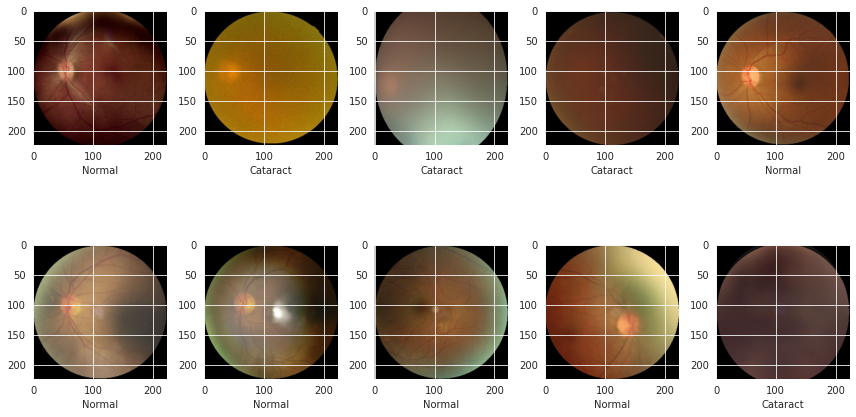

In [ ]:
plot_from_dataset(VGG16_cataract_dataset , 'Cataract')

In [ ]:
x_VGG16_cataract = np.array([i[0] for i in VGG16_cataract_dataset])
y_VGG16_cataract = np.array([i[1] for i in VGG16_cataract_dataset])

In [ ]:
(x_VGG16_cataract.shape, y_VGG16_cataract.shape )

((1080, 224, 224, 3), (1080,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train_VGG16_cataract , x_test_VGG16_cataract , y_train_VGG16_cataract, y_test_VGG16_cataract = train_test_split(x_VGG16_cataract,y_VGG16_cataract,test_size=0.2, random_state=0)

In [ ]:
(x_train_VGG16_cataract.shape , x_test_VGG16_cataract.shape , y_train_VGG16_cataract.shape , y_test_VGG16_cataract.shape)

((864, 224, 224, 3), (216, 224, 224, 3), (864,), (216,))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_VGG16_cataract_categorical = to_categorical(y_train_VGG16_cataract, 1000)
y_test_VGG16_cataract_categorical = to_categorical(y_test_VGG16_cataract,1000)
y_test_VGG16_cataract_categorical.shape

(216, 1000)

In [ ]:
(x_train_VGG16_cataract.shape , x_test_VGG16_cataract.shape , y_train_VGG16_cataract_categorical.shape , y_test_VGG16_cataract_categorical.shape)

((864, 224, 224, 3), (216, 224, 224, 3), (864, 1000), (216, 1000))

### Model Fitting

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

VGG16_cataract_model =VGG16(classifier_activation='softmax')

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
VGG16_cataract_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Ocular Disease/cataractv2.pth", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
y_train_VGG16_cataract_categorical.shape

(864, 1000)

In [ ]:
VGG16_cataract_model.fit(x_train_VGG16_cataract
                         , y_train_VGG16_cataract_categorical
                         ,epochs=2
                         ,validation_data=(x_test_VGG16_cataract, y_test_VGG16_cataract_categorical)
                         ,callbacks=[checkpoint,early])

Epoch 1/2
27/27 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.5231
Epoch 1: val_accuracy improved from -inf to 0.53241, saving model to /content/drive/MyDrive/Ocular Disease/cataractv2.pth
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Ocular Disease/cataractv2.pth/assets
27/27 [==============================] - 38s 1s/step - loss: 0.7038 - accuracy: 0.5231 - val_loss: 0.7066 - val_accuracy: 0.5324
Epoch 2/2
27/27 [==============================] - ETA: 0s - loss: 0.7342 - accuracy: 0.4873
Epoch 2: val_accuracy did not improve from 0.53241
27/27 [==============================] - 25s 937ms/step - loss: 0.7342 - accuracy: 0.4873 - val_loss: 0.8008 - val_accuracy: 0.5324


In [ ]:
VGG16_cataract_model.save_weights('/content/drive/MyDrive/Ocular Disease/my_checkpoint')

In [ ]:
VGG16_cataract_model.load_weights('/content/drive/MyDrive/Ocular Disease/my_checkpoint')

In [ ]:
loss, acc = VGG16_cataract_model.evaluate(x_test_VGG16_cataract,y_test_VGG16_cataract_categorical, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7/7 - 2s - loss: 0.6797 - accuracy: 0.4861 - 2s/epoch - 302ms/step
Restored model, accuracy: 48.61%


In [ ]:
from tensorflow.keras.applications import VGG19

vgg = VGG19(weights = "imagenet", include_top = False, input_shape=(224, 224, 3))
for layer in vgg.layers:
    layer.trainable = False

model_1 = Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(2,activation = "softmax"))
model_1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointm = ModelCheckpoint("/content/drive/MyDrive/Ocular Disease/cataractm.pth")
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
model_1.fit(x_train_VGG16_cataract, y_train_VGG16_cataract_categorical, 
            validation_data=(x_test_VGG16_cataract, y_test_VGG16_cataract_categorical),
            validation_split = 0.2, 
            epochs = 10,
            batch_size = 128,
            callbacks=[checkpointm])

Epoch 1/10


TypeError: ignored

0.49407744 /  0.50591815
cataract


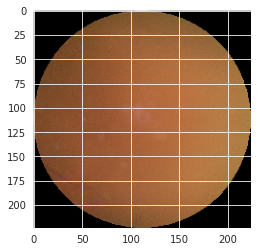

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Ocular Disease/preprocessed_images/24_right.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Ocular Disease/cataractv2.h5")
output = saved_model.predict(img)
print(str(output[0][0]) + " /  "+str(output[0][1]))
if output[0][0] > output[0][1]:
    print("normal")
else:
    print('cataract')

### Model Evaluation

In [ ]:
VGG16_losses=pd.DataFrame(VGG16_cataract_model.history.history)

NameError: ignored

In [ ]:
VGG16_losses.tail()

,loss,accuracy,val_loss,val_accuracy
29,0.687880,0.498843,0.679464,0.449074
30,0.689496,0.505787,0.692675,0.476852
31,0.672657,0.539352,0.673828,0.523148
32,0.653454,0.594907,0.836046,0.476852
33,0.681781,0.553241,0.685961,0.500000


<Figure size 864x432 with 0 Axes>

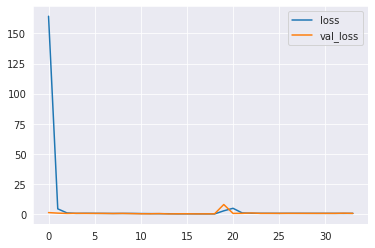

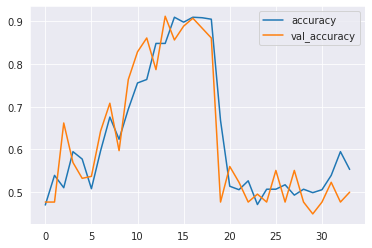

In [ ]:
plot_losses(VGG16_losses)

In [ ]:
def get_predictions(model , x_test) :
  start_time = time.time()
  predictions = np.argmax(model.predict(x_test) , axis=-1)
  end_time = time.time()
  return( (end_time-start_time)/len(x_test) , predictions )

In [ ]:
VGG16_time , VGG16_predictions = get_predictions(VGG16_cataract_model , x_test_VGG16_cataract)

In [ ]:
# VGG16_predictions=np.argmax(VGG16_model.predict(x_test),axis=-1)

In [ ]:
VGG16_confusion = confusion_matrix(VGG16_predictions, y_test_VGG16_cataract)

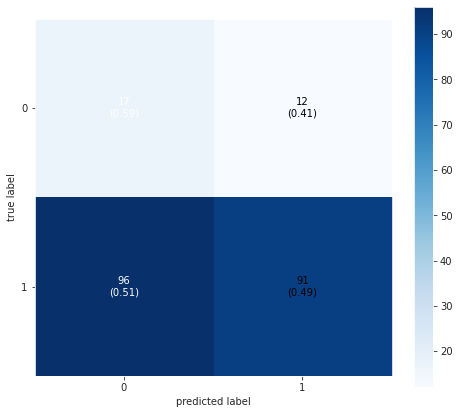

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat = VGG16_confusion,figsize=(8,7),show_normed = True, colorbar= True);

In [ ]:
print(classification_report(y_test_VGG16_cataract, VGG16_predictions ) )

              precision    recall  f1-score   support

           0       0.59      0.15      0.24       113
           1       0.49      0.88      0.63       103

    accuracy                           0.50       216
   macro avg       0.54      0.52      0.43       216
weighted avg       0.54      0.50      0.42       216



## Customized Model


### Preparing data

In [ ]:
cataract_dataset_effects_dict = {
                        'gamma' : 1.2,
                        'canny' : 'canny'
}
cataract_dataset = create_dataset(cataract, normal ,dataset_dir , cataract_dataset_effects_dict)

gamma→canny→/n


 13%|█▎        | 69/540 [01:13<08:19,  1.06s/it]


KeyboardInterrupt: ignored

In [ ]:
np.shape(cataract_dataset)

In [ ]:
plot_from_dataset(cataract_dataset , 'Cataract')

In [ ]:
x_cataract = np.array([i[0] for i in cataract_dataset])
y_cataract = np.array([i[1] for i in cataract_dataset])

In [ ]:
from sklearn.model_selection import train_test_split
x_train_cataract,x_test_cataract,y_train_cataract,y_test_cataract = train_test_split(x_cataract,y_cataract,test_size=0.2, random_state=0)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cataract_categorical = to_categorical(y_train_cataract, 10)
y_test_cataract_categorical = to_categorical(y_test_cataract,10)
y_test_cataract_categorical.shape

In [ ]:
x_train_cataract.shape

### Model Fitting


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,BatchNormalization,Dropout,MaxPool2D

In [ ]:
model=Sequential()
input_shape = (224, 224, 1)

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping
#early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/sample_data/cataract_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
model.fit(x_train_cataract, y_train_cataract_categorical,epochs=25,validation_data=(x_test_cataract, y_test_cataract_categorical),callbacks=[early_stop] )

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Ocular Disease/preprocessed_images/5_right.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/sample_data/cataract.h5")
output = saved_model.predict(img)
print(str(output[0][0]) + " /  "+str(output[0][1]))
if output[0][0] > output[0][1]:
    print("normal")
else:
    print('cataract')

###Model Evaluation

In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses.tail()

In [ ]:
plot_losses(losses)

In [ ]:
def get_predictions(model , x_test) :
  start_time = time.time()
  predictions = np.argmax(model.predict(x_test) , axis=-1)
  end_time = time.time()
  return( (end_time-start_time)/len(x_test) , predictions )

In [ ]:
cataract_time , cataract_predictions = get_predictions(model , x_test_cataract)

In [ ]:
cataract_confusion = confusion_matrix(cataract_predictions, y_test_cataract)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat = cataract_confusion,figsize=(8,7),show_normed = True, colorbar= True);

In [ ]:
VGG16_time / cataract_time

In [ ]:
print(classification_report(y_test_cataract, cataract_predictions ) )

## Glaucoma Detection

### Preparing Data

In [ ]:
dataset_VGG16_glaucoma_effects_dict = {'gamma': .9}
VGG16_glaucoma_dataset = create_dataset(glaucoma, normal ,dataset_dir , dataset_VGG16_glaucoma_effects_dict)

In [ ]:
np.shape(VGG16_glaucoma_dataset)

318

In [ ]:
plot_from_dataset(VGG16_glaucoma_dataset , 'Glaucoma')

In [ ]:
(x_VGG16_glaucoma.shape, y_VGG16_glaucoma.shape )

crop→gamma→/n


100%|██████████| 317/317 [00:02<00:00, 121.71it/s]


mirror→crop→gamma→/n


100%|██████████| 274/274 [00:02<00:00, 116.95it/s]


In [ ]:
from sklearn.model_selection import train_test_split
x_train_VGG16_glaucoma , x_test_VGG16_glaucoma , y_train_VGG16_glaucoma, y_test_VGG16_glaucoma = train_test_split(x_VGG16_glaucoma,y_VGG16_glaucoma,test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


((634, 2), (548, 2))

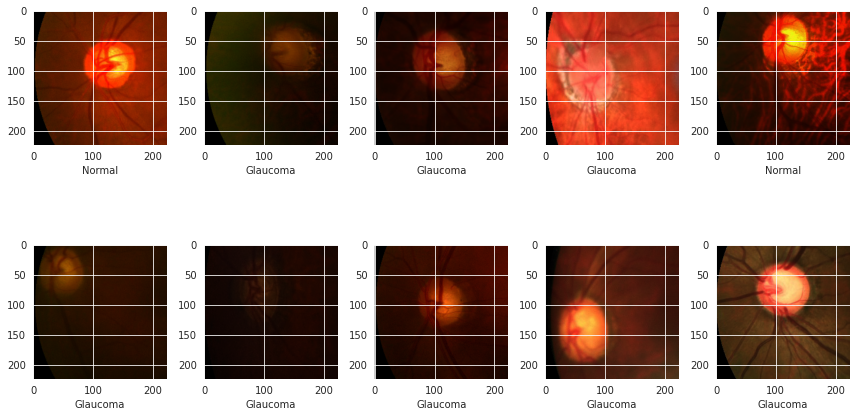

In [ ]:
(x_train_VGG16_glaucoma.shape , x_test_VGG16_glaucoma.shape , y_train_VGG16_glaucoma.shape , y_test_VGG16_glaucoma.shape)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_VGG16_glaucoma_categorical = to_categorical(y_train_VGG16_glaucoma, 1000)
y_test_VGG16_glaucoma_categorical = to_categorical(y_test_VGG16_glaucoma,1000)
y_test_VGG16_glaucoma_categorical.shape

NameError: ignored

In [ ]:
(x_train_VGG16_glaucoma.shape , x_test_VGG16_glaucoma.shape , y_train_VGG16_glaucoma_categorical.shape , y_test_VGG16_glaucoma_categorical.shape)

1182

### Model Fitting

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

VGG16_glaucoma_model =VGG16(classifier_activation='softmax')

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
VGG16_glaucoma_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Ocular Disease/glaucoma.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
y_train_VGG16_glaucoma_categorical.shape

(945, 1000)

In [ ]:
VGG16_glaucoma_model.fit(x_train_VGG16_glaucoma
                         , y_train_VGG16_glaucoma_categorical
                         ,epochs=50
                         ,validation_data=(x_test_VGG16_glaucoma, y_test_VGG16_glaucoma_categorical)
                         ,callbacks=[checkpoint,early])

0.401676 /  0.59826124
glaucoma


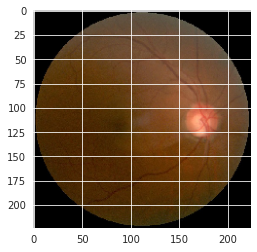

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Ocular Disease/preprocessed_images/1241_right.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Ocular Disease/glaucoma.h5")
output = saved_model.predict(img)
print(str(output[0][0]) + " /  "+str(output[0][1]))
if output[0][0] > output[0][1]:
    print("normal")
else:
    print('glaucoma')

### Model Evaluation

In [ ]:
glaucoma_losses=pd.DataFrame(glaucoma_model.history.history)

In [ ]:
losses.tail()

NameError: ignored

In [ ]:
plot_losses(glaucoma_losses)

In [ ]:
def get_predictions(model , x_test) :
  start_time = time.time()
  predictions = np.argmax(model.predict(x_test) , axis=-1)
  end_time = time.time()
  return( (end_time-start_time)/len(x_test) , predictions )

In [ ]:
glaucoma_time , glaucoma_predictions = get_predictions(glaucoma_model , x_test_glaucoma)

In [ ]:
glaucoma_confusion = confusion_matrix(glaucoma_predictions, y_test_glaucoma)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat = glaucoma_confusion,figsize=(8,7),show_normed = True, colorbar= True);

In [ ]:
glaucoma_time

In [ ]:
print(classification_report(y_test_glaucoma, glaucoma_predictions ) )

## Diabetes detection 

### Preparing data

In [ ]:
dataset_VGG16_diabetes_effects_dict = {'gamma': .9}
VGG16_diabetes_dataset = create_dataset(diabetes, normal ,dataset_dir , dataset_VGG16_diabetes_effects_dict)

gamma→/n


100%|██████████| 3237/3237 [10:48<00:00,  4.99it/s]


In [ ]:
np.shape(VGG16_diabetes_dataset)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(6474, 2)

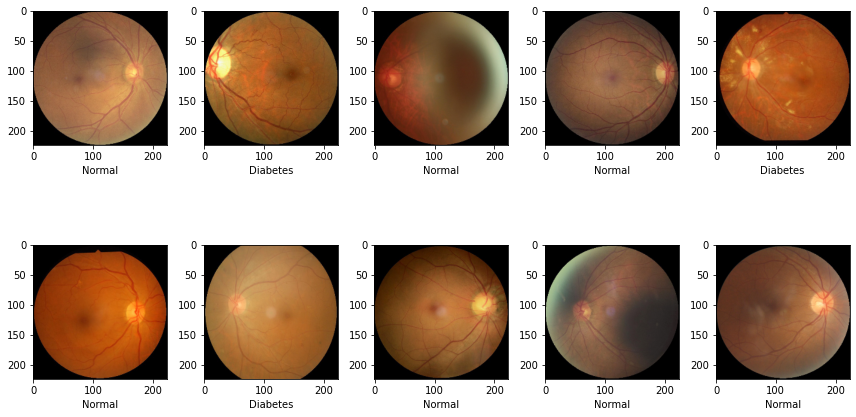

In [ ]:
plot_from_dataset(VGG16_diabetes_dataset , 'Diabetes')

In [ ]:
x_VGG16_diabetes = np.array([i[0] for i in VGG16_diabetes_dataset])
y_VGG16_diabetes = np.array([i[1] for i in VGG16_diabetes_dataset])

In [ ]:
(x_VGG16_diabetes.shape, y_VGG16_diabetes.shape )

((6474, 224, 224, 3), (6474,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train_VGG16_diabetes , x_test_VGG16_diabetes , y_train_VGG16_diabetes, y_test_VGG16_diabetes = train_test_split(x_VGG16_diabetes,y_VGG16_diabetes,test_size=0.2, random_state=0)

In [ ]:
(x_train_VGG16_diabetes.shape , x_test_VGG16_diabetes.shape , y_train_VGG16_diabetes.shape , y_test_VGG16_diabetes.shape)

((5179, 224, 224, 3), (1295, 224, 224, 3), (5179,), (1295,))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_VGG16_diabetes_categorical = to_categorical(y_train_VGG16_diabetes, 1000)
y_test_VGG16_diabetes_categorical = to_categorical(y_test_VGG16_diabetes,1000)
y_test_VGG16_diabetes_categorical.shape

(1295, 1000)

In [ ]:
(x_train_VGG16_diabetes.shape , x_test_VGG16_diabetes.shape , y_train_VGG16_diabetes_categorical.shape , y_test_VGG16_diabetes_categorical.shape)

((5179, 224, 224, 3), (1295, 224, 224, 3), (5179, 1000), (1295, 1000))

### Model Fitting

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

VGG16_diabetes_model =VGG16(classifier_activation='softmax')

553476096/553467096 [==============================] - 5s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
VGG16_diabetes_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Ocular Disease/diabetes.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
y_train_VGG16_diabetes_categorical.shape

(5179, 1000)

In [ ]:
VGG16_diabetes_model.fit(x_train_VGG16_diabetes
                         , y_train_VGG16_diabetes_categorical
                         ,epochs=50
                         ,validation_data=(x_test_VGG16_diabetes, y_test_VGG16_diabetes_categorical)
                         ,callbacks=[checkpoint,early])

Epoch 1/50
162/162 [==============================] - ETA: 0s - loss: 4.7432 - accuracy: 0.5163
Epoch 1: val_accuracy improved from -inf to 0.51429, saving model to /content/drive/MyDrive/Ocular Disease/diabetes.h5
162/162 [==============================] - 193s 1s/step - loss: 4.7432 - accuracy: 0.5163 - val_loss: 0.6858 - val_accuracy: 0.5143
Epoch 2/50
162/162 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.5115
Epoch 2: val_accuracy did not improve from 0.51429
162/162 [==============================] - 153s 943ms/step - loss: 0.7023 - accuracy: 0.5115 - val_loss: 0.6944 - val_accuracy: 0.5035
Epoch 3/50
162/162 [==============================] - ETA: 0s - loss: 0.6977 - accuracy: 0.5142
Epoch 3: val_accuracy did not improve from 0.51429
162/162 [==============================] - 152s 937ms/step - loss: 0.6977 - accuracy: 0.5142 - val_loss: 0.7011 - val_accuracy: 0.4958
Epoch 4/50
162/162 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 

ResourceExhaustedError: ignored

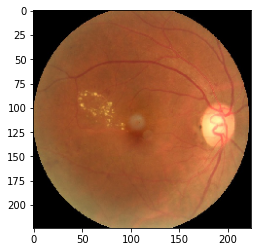

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Ocular Disease/preprocessed_images/5_right.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Ocular Disease/diabetes.h5")
output = saved_model.predict(img)
print(str(output[0][0]) + " /  "+str(output[0][1]))
if output[0][0] > output[0][1]:
    print(" diabetes")
else:
    print('normal')

### Model Evaluation

In [ ]:
VGG16_losses=pd.DataFrame(VGG16_diabetes_model.history.history)

In [ ]:
VGG16_losses.tail()

,loss,accuracy,val_loss,val_accuracy
19,0.694588,0.492180,0.693869,0.488031
20,0.693730,0.512068,0.692958,0.511969
21,0.693894,0.492373,0.692881,0.511969
22,0.693881,0.503379,0.696167,0.488031
23,0.694505,0.483491,0.692959,0.511969


<Figure size 864x432 with 0 Axes>

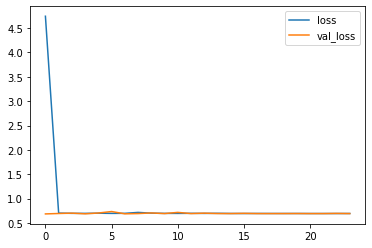

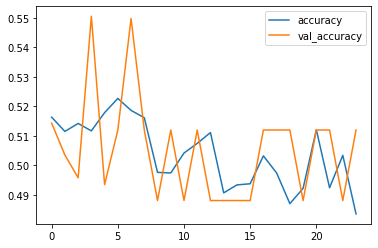

In [ ]:
plot_losses(VGG16_losses)

In [ ]:
def get_predictions(model , x_test) :
  start_time = time.time()
  predictions = np.argmax(model.predict(x_test) , axis=-1)
  end_time = time.time()
  return( (end_time-start_time)/len(x_test) , predictions )

In [ ]:
VGG16_time , VGG16_predictions = get_predictions(VGG16_diabetes_model , x_test_VGG16_diabetes)

In [ ]:
VGG16_confusion = confusion_matrix(VGG16_predictions, y_test_VGG16_diabetes)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


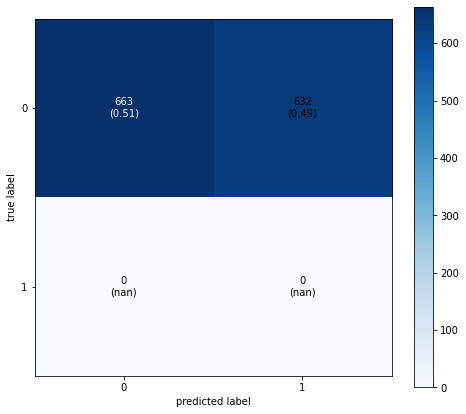

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat = VGG16_confusion,figsize=(8,7),show_normed = True, colorbar= True);

## Age related macular degeneration

### Preparing data

In [ ]:
dataset_VGG16_age_related_macular_degeneration_effects_dict = {'gamma': .9}
VGG16_age_related_macular_degeneration_dataset = create_dataset(age_related_macular_degeneration, normal ,dataset_dir , dataset_VGG16_age_related_macular_degeneration_effects_dict)

gamma→/n


100%|██████████| 545/545 [02:12<00:00,  4.10it/s]


In [ ]:
np.shape(VGG16_age_related_macular_degeneration_dataset)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(1090, 2)

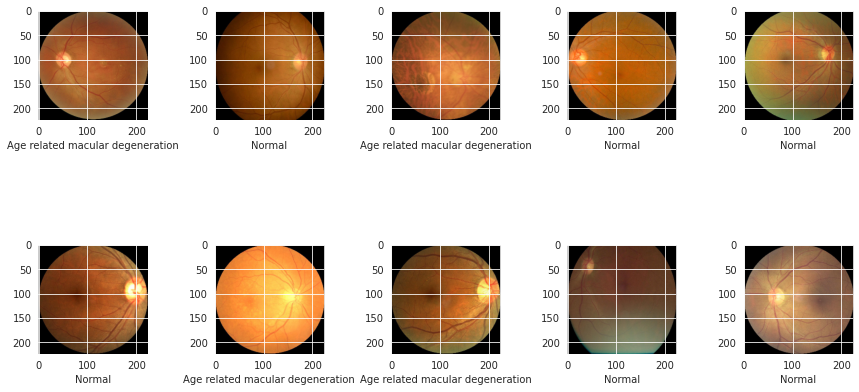

In [ ]:
plot_from_dataset(VGG16_age_related_macular_degeneration_dataset , 'Age related macular degeneration')

In [ ]:
x_VGG16_age_related_macular_degeneration = np.array([i[0] for i in VGG16_age_related_macular_degeneration_dataset])
y_VGG16_age_related_macular_degeneration = np.array([i[1] for i in VGG16_age_related_macular_degeneration_dataset])

In [ ]:
(x_VGG16_age_related_macular_degeneration.shape, y_VGG16_age_related_macular_degeneration.shape )

((1090, 224, 224, 3), (1090,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train_VGG16_age_related_macular_degeneration , x_test_VGG16_age_related_macular_degeneration , y_train_VGG16_age_related_macular_degeneration, y_test_VGG16_age_related_macular_degeneration = train_test_split(x_VGG16_age_related_macular_degeneration,y_VGG16_age_related_macular_degeneration,test_size=0.2, random_state=0)

In [ ]:
(x_train_VGG16_age_related_macular_degeneration.shape , x_test_VGG16_age_related_macular_degeneration.shape , y_train_VGG16_age_related_macular_degeneration.shape , y_test_VGG16_age_related_macular_degeneration.shape)

((872, 224, 224, 3), (218, 224, 224, 3), (872,), (218,))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_VGG16_age_related_macular_degeneration_categorical = to_categorical(y_train_VGG16_age_related_macular_degeneration, 1000)
y_test_VGG16_age_related_macular_degeneration_categorical = to_categorical(y_test_VGG16_age_related_macular_degeneration,1000)
y_test_VGG16_age_related_macular_degeneration_categorical.shape

(218, 1000)

In [ ]:
(x_train_VGG16_age_related_macular_degeneration.shape , x_test_VGG16_age_related_macular_degeneration.shape , y_train_VGG16_age_related_macular_degeneration_categorical.shape , y_test_VGG16_age_related_macular_degeneration_categorical.shape)

((872, 224, 224, 3), (218, 224, 224, 3), (872, 1000), (218, 1000))

### Model Fitting

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

VGG16_age_related_macular_degeneration_model =VGG16(classifier_activation='softmax')

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
VGG16_age_related_macular_degeneration_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Ocular Disease/age_related_macular_degeneration.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
y_train_VGG16_age_related_macular_degeneration_categorical.shape

(872, 1000)

In [ ]:
VGG16_age_related_macular_degeneration_model.fit(x_train_VGG16_age_related_macular_degeneration
                         , y_train_VGG16_age_related_macular_degeneration_categorical
                         ,epochs=50
                         ,validation_data=(x_test_VGG16_age_related_macular_degeneration, y_test_VGG16_age_related_macular_degeneration_categorical)
                         ,callbacks=[checkpoint,early])

Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 34.9361 - accuracy: 0.4862
Epoch 1: val_accuracy improved from -inf to 0.56881, saving model to /content/drive/MyDrive/Ocular Disease/age_related_macular_degeneration.h5
28/28 [==============================] - 70s 2s/step - loss: 34.9361 - accuracy: 0.4862 - val_loss: 0.6813 - val_accuracy: 0.5688
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 0.7409 - accuracy: 0.4943
Epoch 2: val_accuracy did not improve from 0.56881
28/28 [==============================] - 12s 428ms/step - loss: 0.7409 - accuracy: 0.4943 - val_loss: 0.7833 - val_accuracy: 0.4954
Epoch 3/50
28/28 [==============================] - ETA: 0s - loss: 0.7017 - accuracy: 0.5298
Epoch 3: val_accuracy improved from 0.56881 to 0.61009, saving model to /content/drive/MyDrive/Ocular Disease/age_related_macular_degeneration.h5
28/28 [==============================] - 20s 715ms/step - loss: 0.7017 - accuracy: 0.5298 - val_loss: 0.6800 - val_

0.49466363 /  0.50528276
normal 


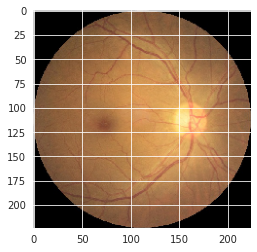

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Ocular Disease/preprocessed_images/1_right.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Ocular Disease/age_related_macular_degeneration.h5")
output = saved_model.predict(img)
print(str(output[0][0]) + " /  "+str(output[0][1]))
if output[0][0] > output[0][1]:
    print("age related macular degeneration")
else:
    print('normal ')

### Model Evaluation

In [ ]:
VGG16_losses=pd.DataFrame(VGG16_age_related_macular_degeneration_model.history.history)

In [ ]:
VGG16_losses.tail()

,loss,accuracy,val_loss,val_accuracy
18,0.651475,0.583716,0.751092,0.541284
19,0.669259,0.587156,0.720065,0.545872
20,0.666364,0.569954,0.700574,0.550459
21,0.660035,0.589450,0.725900,0.532110
22,0.664465,0.582569,0.685565,0.550459


<Figure size 864x432 with 0 Axes>

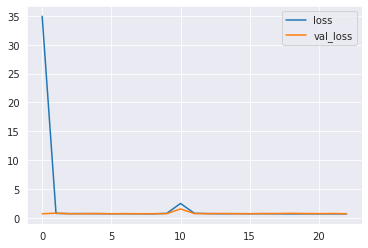

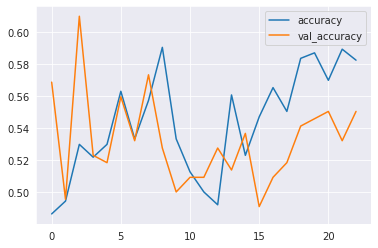

In [ ]:
plot_losses(VGG16_losses)

In [ ]:
def get_predictions(model , x_test) :
  start_time = time.time()
  predictions = np.argmax(model.predict(x_test) , axis=-1)
  end_time = time.time()
  return( (end_time-start_time)/len(x_test) , predictions )

In [ ]:
VGG16_time , VGG16_predictions = get_predictions(VGG16_age_related_macular_degeneration_model , x_test_VGG16_age_related_macular_degeneration)

In [ ]:
# VGG16_predictions=np.argmax(VGG16_model.predict(x_test),axis=-1)

In [ ]:
VGG16_confusion = confusion_matrix(VGG16_predictions, y_test_VGG16_age_related_macular_degeneration)

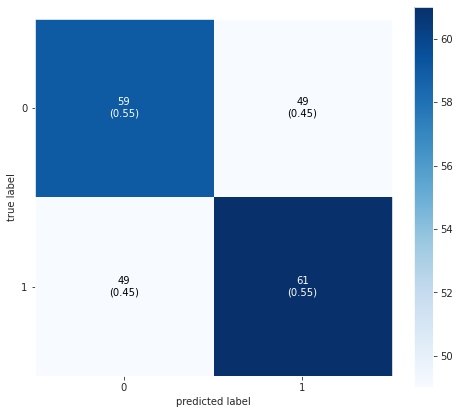

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat = VGG16_confusion,figsize=(8,7),show_normed = True, colorbar= True);

In [ ]:
print(classification_report(y_test_VGG16_age_related_macular_degeneration, VGG16_predictions ) )

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       108
           1       0.55      0.55      0.55       110

    accuracy                           0.55       218
   macro avg       0.55      0.55      0.55       218
weighted avg       0.55      0.55      0.55       218



Hypertension detection
---

### VGG16 Model

helping functions

Preparing data

In [ ]:
dataset_VGG16_hypertension_effects_dict = {'gamma': .9}
VGG16_hypertension_dataset = create_dataset(hypertension, normal ,dataset_dir , dataset_VGG16_hypertension_effects_dict)

gamma→/n


100%|██████████| 382/382 [01:21<00:00,  4.66it/s]


In [ ]:
np.shape(VGG16_hypertension_dataset)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(764, 2)

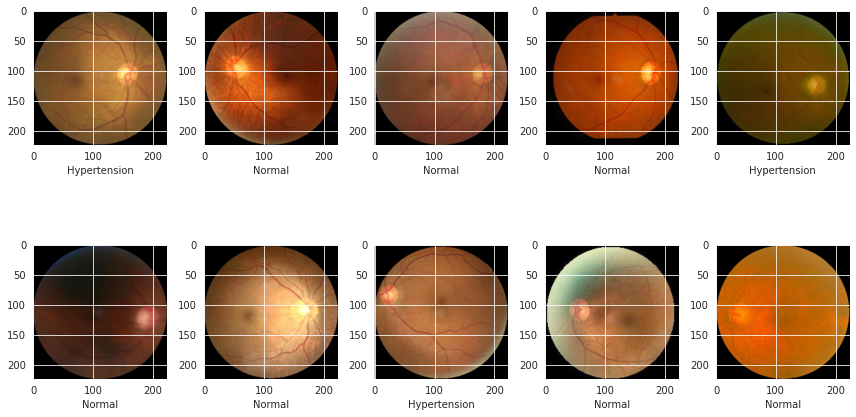

In [ ]:
plot_from_dataset(VGG16_hypertension_dataset , 'Hypertension')

In [ ]:
x_VGG16_hypertension = np.array([i[0] for i in VGG16_hypertension_dataset])
y_VGG16_hypertension = np.array([i[1] for i in VGG16_hypertension_dataset])

In [ ]:
(x_VGG16_hypertension.shape, y_VGG16_hypertension.shape )

((764, 224, 224, 3), (764,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train_VGG16_hypertension , x_test_VGG16_hypertension , y_train_VGG16_hypertension, y_test_VGG16_hypertension = train_test_split(x_VGG16_hypertension,y_VGG16_hypertension,test_size=0.2, random_state=0)

In [ ]:
(x_train_VGG16_hypertension.shape , x_test_VGG16_hypertension.shape , y_train_VGG16_hypertension.shape , y_test_VGG16_hypertension.shape)

((611, 224, 224, 3), (153, 224, 224, 3), (611,), (153,))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_VGG16_hypertension_categorical = to_categorical(y_train_VGG16_hypertension, 1000)
y_test_VGG16_hypertension_categorical = to_categorical(y_test_VGG16_hypertension,1000)
y_test_VGG16_hypertension_categorical.shape

(153, 1000)

In [ ]:
(x_train_VGG16_hypertension.shape , x_test_VGG16_hypertension.shape , y_train_VGG16_hypertension_categorical.shape , y_test_VGG16_hypertension_categorical.shape)

((611, 224, 224, 3), (153, 224, 224, 3), (611, 1000), (153, 1000))

### Model Fitting

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

VGG16_hypertension_model =VGG16(classifier_activation='softmax')

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
VGG16_hypertension_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Ocular Disease/hypertension.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
y_train_VGG16_hypertension_categorical.shape

(611, 1000)

In [ ]:
VGG16_hypertension_model.fit(x_train_VGG16_hypertension
                         , y_train_VGG16_hypertension_categorical
                         ,epochs=50
                         ,validation_data=(x_test_VGG16_hypertension, y_test_VGG16_hypertension_categorical)
                         ,callbacks=[checkpoint,early])

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 54.4675 - accuracy: 0.4894
Epoch 1: val_accuracy improved from -inf to 0.50980, saving model to /content/drive/MyDrive/Ocular Disease/hypertension.h5
20/20 [==============================] - 21s 1s/step - loss: 54.4675 - accuracy: 0.4894 - val_loss: 1.0522 - val_accuracy: 0.5098
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.8442 - accuracy: 0.5123
Epoch 2: val_accuracy did not improve from 0.50980
20/20 [==============================] - 9s 428ms/step - loss: 0.8442 - accuracy: 0.5123 - val_loss: 0.6919 - val_accuracy: 0.5098
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.7067 - accuracy: 0.5106
Epoch 3: val_accuracy did not improve from 0.50980
20/20 [==============================] - 9s 431ms/step - loss: 0.7067 - accuracy: 0.5106 - val_loss: 1.3383 - val_accuracy: 0.5098
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.7850 - accuracy: 0.4959
Epoch 

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Ocular Disease/preprocessed_images/24_right.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Ocular Disease/hypertension.h5")
output = saved_model.predict(img)
print(str(output[0][0]) + " /  "+str(output[0][1]))
if output[0][0] > output[0][1]:
    print("normal")
else:
    print('hypertension')

### Model Evaluation

In [ ]:
VGG16_losses=pd.DataFrame(VGG16_hypertension_model.history.history)

In [ ]:
VGG16_losses.tail()

In [ ]:
plot_losses(VGG16_losses)

In [ ]:
def get_predictions(model , x_test) :
  start_time = time.time()
  predictions = np.argmax(model.predict(x_test) , axis=-1)
  end_time = time.time()
  return( (end_time-start_time)/len(x_test) , predictions )

In [ ]:
VGG16_time , VGG16_predictions = get_predictions(VGG16_hypertension_model , x_test_VGG16_hypertension)

In [ ]:
# VGG16_predictions=np.argmax(VGG16_model.predict(x_test),axis=-1)

In [ ]:
VGG16_confusion = confusion_matrix(VGG16_predictions, y_test_VGG16_hypertension)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat = VGG16_confusion,figsize=(8,7),show_normed = True, colorbar= True);

In [ ]:
print(classification_report(y_test_VGG16_hypertension, VGG16_predictions ) )

In [ ]:
diabetes

Pthological myopia detection
---

### VGG16 Model

helping functions

Preparing data

In [ ]:
dataset_VGG16_pathological_myopia_effects_dict = {'gamma': .9}
VGG16_pathological_myopia_dataset = create_dataset(pathological_myopia, normal ,dataset_dir , dataset_VGG16_pathological_myopia_effects_dict)

gamma→/n


100%|██████████| 451/451 [01:23<00:00,  5.42it/s]


In [ ]:
np.shape(VGG16_pathological_myopia_dataset)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(902, 2)

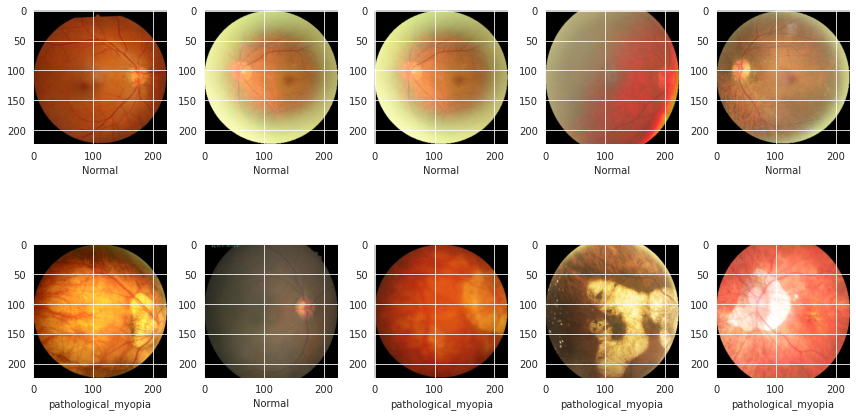

In [ ]:
plot_from_dataset(VGG16_pathological_myopia_dataset , 'pathological_myopia')

In [ ]:
x_VGG16_pathological_myopia = np.array([i[0] for i in VGG16_pathological_myopia_dataset])
y_VGG16_pathological_myopia = np.array([i[1] for i in VGG16_pathological_myopia_dataset])

In [ ]:
(x_VGG16_pathological_myopia.shape, y_VGG16_pathological_myopia.shape )

((902, 224, 224, 3), (902,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train_VGG16_pathological_myopia , x_test_VGG16_pathological_myopia , y_train_VGG16_pathological_myopia, y_test_VGG16_pathological_myopia = train_test_split(x_VGG16_pathological_myopia,y_VGG16_pathological_myopia,test_size=0.2, random_state=0)

In [ ]:
(x_train_VGG16_pathological_myopia.shape , x_test_VGG16_pathological_myopiat.shape , y_train_VGG16_pathological_myopia.shape , y_test_VGG16_pathological_myopia.shape)

NameError: ignored

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_VGG16_pathological_myopia_categorical = to_categorical(y_train_VGG16_pathological_myopia, 1000)
y_test_VGG16_pathological_myopia_categorical = to_categorical(y_test_VGG16_pathological_myopia,1000)
y_test_VGG16_pathological_myopia_categorical.shape

(181, 1000)

In [ ]:
(x_train_VGG16_pathological_myopia.shape , x_test_VGG16_pathological_myopia.shape , y_train_VGG16_pathological_myopia_categorical.shape , y_test_VGG16_pathological_myopia_categorical.shape)

((721, 224, 224, 3), (181, 224, 224, 3), (721, 1000), (181, 1000))

### Model Fitting

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

VGG16_pathological_myopia_model =VGG16(classifier_activation='softmax')

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
VGG16_pathological_myopia_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Ocular Disease/pathological_myopia.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
y_train_VGG16_pathological_myopia_categorical.shape

(721, 1000)

In [ ]:
VGG16_pathological_myopia_model.fit(x_train_VGG16_pathological_myopia
                         , y_train_VGG16_pathological_myopia_categorical
                         ,epochs=50
                         ,validation_data=(x_test_VGG16_pathological_myopia, y_test_VGG16_pathological_myopia_categorical)
                         ,callbacks=[checkpoint,early])

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 226.2926 - accuracy: 0.5132
Epoch 1: val_accuracy improved from -inf to 0.49724, saving model to /content/drive/MyDrive/Ocular Disease/pathological_myopia.h5
23/23 [==============================] - 24s 1s/step - loss: 226.2926 - accuracy: 0.5132 - val_loss: 0.7553 - val_accuracy: 0.4972
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 0.7266 - accuracy: 0.5867
Epoch 2: val_accuracy improved from 0.49724 to 0.76796, saving model to /content/drive/MyDrive/Ocular Disease/pathological_myopia.h5
23/23 [==============================] - 18s 778ms/step - loss: 0.7266 - accuracy: 0.5867 - val_loss: 0.5463 - val_accuracy: 0.7680
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 0.6477 - accuracy: 0.6574
Epoch 3: val_accuracy did not improve from 0.76796
23/23 [==============================] - 10s 439ms/step - loss: 0.6477 - accuracy: 0.6574 - val_loss: 0.5920 - val_accuracy: 0.6740
Epoch 4

0.014365987 /  0.98563355
pathological_myopia


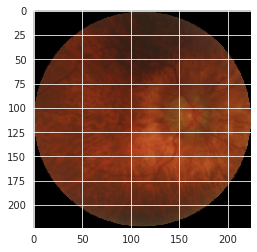

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Ocular Disease/preprocessed_images/13_right.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Ocular Disease/pathological_myopia.h5")
output = saved_model.predict(img)
print(str(output[0][0]) + " /  "+str(output[0][1]))
if output[0][0] > output[0][1]:
    print("normal")
else:
    print('pathological_myopia')

### Model Evaluation

In [ ]:
VGG16_losses=pd.DataFrame(VGG16_pathological_myopia_model.history.history)

In [ ]:
VGG16_losses.tail()

In [ ]:
plot_losses(VGG16_losses)

In [ ]:
def get_predictions(model , x_test) :
  start_time = time.time()
  predictions = np.argmax(model.predict(x_test) , axis=-1)
  end_time = time.time()
  return( (end_time-start_time)/len(x_test) , predictions )

In [ ]:
VGG16_time , VGG16_predictions = get_predictions(VGG16_pathological_myopia_model , x_test_VGG16_pathological_myopia)

In [ ]:
# VGG16_predictions=np.argmax(VGG16_model.predict(x_test),axis=-1)

In [ ]:
VGG16_confusion = confusion_matrix(VGG16_predictions, y_test_VGG16_pathological_myopia)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat = VGG16_confusion,figsize=(8,7),show_normed = True, colorbar= True);

In [ ]:
print(classification_report(y_test_VGG16_pathological_myopia, VGG16_predictions ) )